# Support Vector Regression (SVR)

## Dataset

### Layout

* Columns: 3
    * Position
    * Level
    * Salary
* Rows: 11 observations
    * Each row represents one position
       * Features:
          * Position
          * Level
       * Dependent variable:
          * Salary

### Scenario

**HR Department**

* Department wants to hire a candidate for a specific position
* At the end of the interview process, department wants to know candidate's salary expectation
* Candidate is advanced in career and is asking for $160,000 per year
* Department asks candidate why he/she expects such a high salary?
    * Candidate indicates this is what the candidate earned at a previous position at another company

### Background

* Dataset contains salaries of positions from candidate's previous company
* Data was collected from a 3rd party job site, such as Glassdoor
* Candidate has been in a Region Manager position for the last 2 years
* After 2 years in the same position, candidate should be higher in salary, somewhere between Region Manager and Partner, which is levels 6 and 7, respectively
* Candidate's position will be considered level 6.5

### Wants to Understand

**HR Department**

* Is this salary expectation valid or a bluff?

### Goals

* Build SVR model to predict previous salary of candidate
	* Predict candidate salary between levels 6 and 7

## Feature Scaling

* In SVR, there is an implicit relationship between the dependent variable and the features
* Feature scaling needs to be applied because in the SVR equation, features are NOT multiplied by a coefficient
* For feature values higher than others, there is no coefficient to compensate to put all feature values on the same scale, therefore, feature scaling must be applied to put all values on the same scale
* In other types of linear regression, when feature values are multiplied by their coefficients, the resulting values are generally on an equal scale, therefore, making feature scaling unnecessary
* Does feature scaling need to be applied to the dependent variable, salary?
	* Yes, because the values for the feature, level (i.e. 1, 2,...10), are much lower than salary (i.e. 45k, 60k,...500k)
	* This ensures the feature is not neglected by the SVR model
* Feature scaling must be applied when there is not an explicit equation (also referred to as a relationship) between the dependent variable $y$ and the features $x_1...x_n$ in a linear regression, such as multiple linear regression, where $y$ is an explicit result of the feature values computed in the equation
* SVR equations are implicit, meaning there is not a direct relationship between the dependent variable $y$ and the features $x_1...x_n$ in a linear regression, so feature scaling must be applied to ensure all values are on the same scale
	* If feature scaling is not applied, since the salary is much higher than the level, the level feature may be neglected by the SVR model
	* Feature scaling must be applied on both level and salary to ensure values are on the same scale

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import Dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(*X[:25], sep='\n')

[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]


Reshape the dependent variable `y` values into a 2-D vector.

In [4]:
y = y.reshape(len(y), 1)

In [5]:
print(*y[:25], sep='\n')

[45000]
[50000]
[60000]
[80000]
[110000]
[150000]
[200000]
[300000]
[500000]
[1000000]


## Feature Scaling

* A new `StandardScalar` object instance must be used for the dependent variable values because the mean and standard deviation have already been computed for the feature values
* These would be applied to the dependent variable values if the same `StandardScalar` object instance was used
* Separate mean and standard deviation values need to be computed using a different object instance to correctly scale the dependent variable values

In [6]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [7]:
print(*X[:25], sep='\n')

[-1.5666989]
[-1.21854359]
[-0.87038828]
[-0.52223297]
[-0.17407766]
[0.17407766]
[0.52223297]
[0.87038828]
[1.21854359]
[1.5666989]


In [8]:
print(*y[:25], sep='\n')

[-0.72004253]
[-0.70243757]
[-0.66722767]
[-0.59680786]
[-0.49117815]
[-0.35033854]
[-0.17428902]
[0.17781001]
[0.88200808]
[2.64250325]


## Split Dataset into Training Set and Test Set

Skipping this step to maximize the data in order to make future prediction of salary between levels 6 and 7.

## Train SVR Model on Whole Dataset

In [9]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/Users/cjaehnen/workspace/opengood-aio/python/ai-training/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Visualizing SVR Results

* The features and dependent variable vectors are featured scaled
* One needs to reverse transform them to their original values for clear visualization

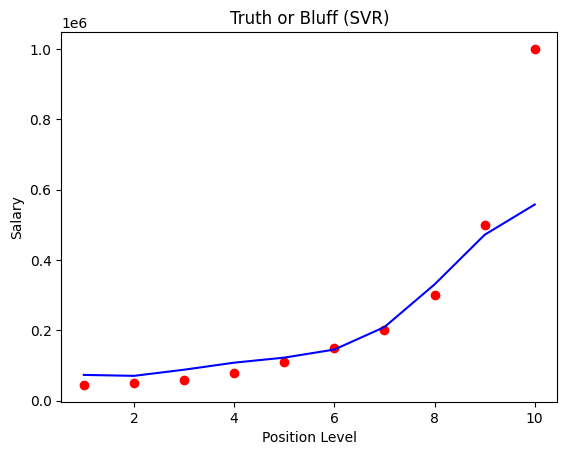

In [10]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualizing SVR Results

### For Higher Resolution and Smoother Curve

/var/folders/12/tsb5ccqx5_32fy1lg_yqpddh0000gn/T/ipykernel_48277/1439788802.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


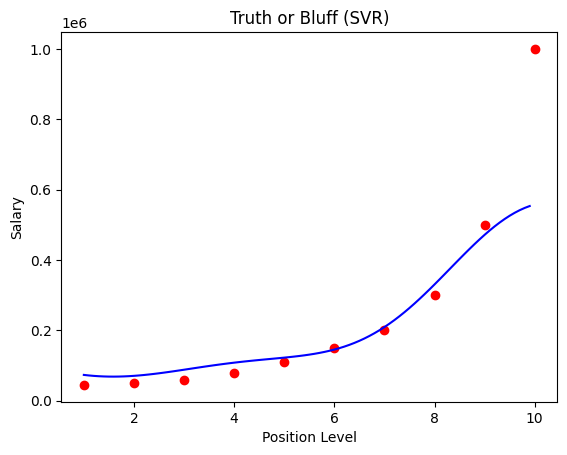

In [11]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Predict New Result

* One needs to transform the input feature value to a scaled value since the model expects feature scaled values
* The `predict` method returns a scaled value for the dependent variable
* One needs to inverse the scaling and transform it back into the original value for dependent variable
    * The `inverse_transform` method performs the scaling inverse and transformation back to an original value
* The `reshape` method invocation prevents any number formatting errors

Predict the salary at position level 6.5 with SVR.

In [12]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1, 1))

In [13]:
print(y_pred)

[[170370.0204065]]


The SVR model predicts a salary very close to $160,000. Good prediction.

**One is confident the salary expectation of the candidate is valid.**